In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

array([7], dtype=uint8)

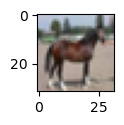

In [8]:
(x,y),(xt,yt) = keras.datasets.cifar10.load_data()
from matplotlib import pyplot as plt
import random
lis = ['Aeroplane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
a  = random.randint(1,5500)
plt.figure(figsize = (1,1))
plt.imshow(x[a])
y[a]

In [ ]:
import datetime
a = datetime.datetime.now()
model = keras.Sequential()
model.add(layers.Conv2D(filters = 100 ,kernel_size = (2,2),activation = 'relu',input_shape = (32,32,3,)))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(filters = 20 ,kernel_size = (2,2),activation = 'relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(keras.layers.Dense(1000,activation = 'relu'))
model.add(layers.Dropout(.2))
# model.add(keras.layers.Dense(30,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'sigmoid'))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x,y,epochs =20)
b = datetime.datetime.now()
b-a

Epoch 1/20
 144/1563 [=>............................] - ETA: 17s - loss: 3.1693 - accuracy: 0.1072

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 25 ,kernel_size = (2,2),activation = 'relu',input_shape = (32,32,3,)))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(filters = 50 ,kernel_size = (2,2),activation = 'relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(keras.layers.Dense(1000,activation = 'relu'))
# model.add(keras.layers.Dense(30,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x,y,epochs =20)



In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report
import numpy as  np
pred = model.predict(xt)
pred = [np.argmax(i) for i in pred]
confusion_matrix(yt,pred)


In [ ]:
accuracy_score(yt,pred)
# pred = 
# for i in range(len(pred)):
#     print(pred[i],yt[i])
def pac(pred,yt) :
    for i in range (1,len(pred)):
        a,b = pred[i],yt[i]
        print(lis[a],lis[int(b)])
# pac(pred,yt)

In [ ]:
print(classification_report(yt,pred))
